In [3]:
# importing libraries and functions
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
import keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import matplotlib as mpl
import tensorflow as tf

from torchvision import transforms
from PIL import Image
from keras import layers
from keras import models
from tqdm import tqdm
from sklearn.utils import shuffle
from keras.utils import to_categorical
from IPython.display import Image, display

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Importing the Data from Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Mapping the 4 labels to an indeces

labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

inverse_class_map = {
    0: 'no_tumor',
    1: 'glioma_tumor',
    2: 'meningioma_tumor',
    3: 'pituitary_tumor'
}

In [7]:
# setting variables for dimension of processed images

h, w = 224, 224

In [8]:
# Create empty lists images and labels
IMAGE = []
LABELS = []


for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Data/Training', label)  # in this folder
    for j in tqdm(os.listdir(folderPath)): # for all elements listed in the folder
        img = cv2.imread(os.path.join(folderPath, j)) # read each image
        img = cv2.resize(img,(h, w))  #resize each image
        IMAGE.append(img) # append it to the list IMAGE
        LABELS.append(class_map[label]) # append appropirate label
train_images = np.array(IMAGE) # convert to array
train_labels = np.array(LABELS) # convert to array


IMAGE = []
LABELS = []
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Data/Testing', label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(h, w))
        IMAGE.append(img)
        LABELS.append(class_map[label])
test_images = np.array(IMAGE)
test_labels = np.array(LABELS)

100%|██████████| 74/74 [00:00<00:00, 103.95it/s]


In [9]:
train_images.shape

(2870, 224, 224, 3)

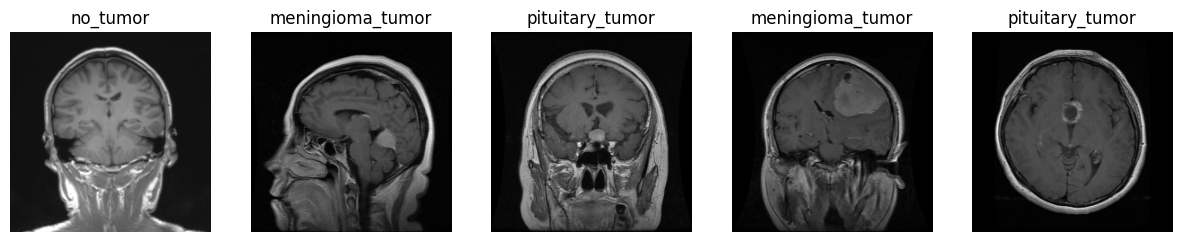

In [10]:
#VIEWING RANDOM IMAGES FROM TRAINING FOLDER

num_images_to_view = 5
random_indices = np.random.choice(len(train_images), num_images_to_view, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_view, i + 1)
    plt.imshow(train_images[idx])
    plt.title(inverse_class_map[train_labels[idx]])
    plt.axis('off')
plt.show()

In [11]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

    # Converting labels to categorical form

val_labels = to_categorical(val_labels)

In [12]:
# Converting labels to categorical form
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
print(f"train_labels shape: {train_labels.shape}")
print(f"val_labels shape: {val_labels.shape}")


train_labels shape: (2296, 4)
val_labels shape: (574, 4)


In [14]:
#Pre-Trained EfficientNetBO

from tensorflow.keras.applications import EfficientNetB0

eff_base = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))
eff_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [66]:
def Model ():
  model = models.Sequential()
  model.add(eff_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(4, activation='softmax'))
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  model.fit(train_images,train_labels, epochs=15, batch_size=60, validation_data=(val_images, val_labels))
  return model

In [67]:
model = Model()

Epoch 1/15
39/39 [==============================] - 50s 418ms/step - loss: 1.0583 - accuracy: 0.9425 - val_loss: 1.8229 - val_accuracy: 0.9233
Epoch 2/15
39/39 [==============================] - 14s 351ms/step - loss: 0.3773 - accuracy: 0.9843 - val_loss: 1.8283 - val_accuracy: 0.9425
Epoch 3/15
39/39 [==============================] - 14s 349ms/step - loss: 0.6051 - accuracy: 0.9747 - val_loss: 1.5170 - val_accuracy: 0.9530
Epoch 4/15
39/39 [==============================] - 14s 349ms/step - loss: 0.1349 - accuracy: 0.9939 - val_loss: 1.0447 - val_accuracy: 0.9652
Epoch 5/15
39/39 [==============================] - 14s 348ms/step - loss: 0.0792 - accuracy: 0.9935 - val_loss: 0.3810 - val_accuracy: 0.9843
Epoch 6/15
39/39 [==============================] - 14s 348ms/step - loss: 0.1138 - accuracy: 0.9943 - val_loss: 0.4161 - val_accuracy: 0.9774
Epoch 7/15
39/39 [==============================] - 14s 350ms/step - loss: 0.0457 - accuracy: 0.9952 - val_loss: 0.4720 - val_accuracy: 0.9739

In [68]:
# Testing the model with test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

# printing the test accuracy
print('test_acc:', test_acc)

13/13 [==============================] - 0s 35ms/step - loss: 8.6486 - accuracy: 0.7538
test_acc: 0.7538071274757385


In [69]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7878a5bc6b90>>

In [70]:
for layer in reversed(eff_base.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break


In [71]:
last_conv_layer_name

'top_conv'

In [72]:
# Testing the model with test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

# printing the test accuracy
print('test_acc:', test_acc)

13/13 [==============================] - 0s 34ms/step - loss: 8.6486 - accuracy: 0.7538
test_acc: 0.7538071274757385


In [73]:
#https://keras.io/examples/vision/grad_cam/
def make_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
  # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [74]:
#https://keras.io/examples/vision/grad_cam/
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
#    img = keras.utils.load_img(img_path)
#    img = keras.utils.img_to_array(img)
#    img = cv2.imread(img_path)
#    img = cv2.resize(img,(h, w))
#    img = np.array(img)
    img = np.squeeze(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    #display(Image(cam_path))
    #output_image = Image(cam_path)
    return superimposed_img  # The output is a PIL image

In [75]:
# Function to pre_process the gradio input data
# input data("image") is an np.array of any shape
def image_array(image):
  image = cv2.resize(image,(224, 224))
  img_array = np.array(image) # resize the input image to (224,224,3)
  img_array = np.expand_dims(img_array, axis=0) # expand dimensions to shape (1,224,224,3)
  return img_array
# image_array is an np.array of shape (1,224,224,3)

In [76]:
# Funtion to predict the output of the model using the img_array as input
def predictions(img_array):
  predictions = model.predict(img_array)
  predicted_class_index = np.argmax(predictions)
  predicted_class_label = labels[predicted_class_index]
  predicted_probability = predictions[0][predicted_class_index]

  return predicted_class_label, predicted_probability

In [52]:
pip install gradio

In [77]:
import gradio as gr

def predictor(image):
  # Function to resize and preprocess
  img_array = image_array(image)
  # Function to make predictions
  name = predictions(img_array)[0] # Tumor Name
  chance = predictions(img_array)[1] # Chance
  # Heatmap
  check_hm = make_heatmap(img_array, model,last_conv_layer_name ,1)
  # Superimpose
  x = save_and_display_gradcam(img_array, check_hm) # pil output accepted by gradio
  #x_array = np.array(x) # array output accepted too

  return name, chance, x #x_array



demo = gr.Interface(fn=predictor, inputs="image", outputs=["text","text","image"])
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://93638a355af26c4892.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
